# 29 - Clasificación Múltiple:  Regresión Logística con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con las Regresión Logística usando la librería de Scikit-Learn***.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo el tamaños del sépalo*** de la flor.


* A diferencia de la Clasificación Binaria en el que obtenemos un solo modelo (una sola función de decisión), ***en la Clasificación múltiple obtenemos tantos modelos como clases tengamos que clasificar***.


* Esto es debido a que la clasificación que hace la Regresión Logística (y también otros algoritmos de aprendizaje de clasificación) es ***discernir una clase con el resto de clases***; o dicho de otra manera más gráfica, ***definir tantas "lineas" (Decision Boundaries) como clases haya*** para separar esa clase del resto de clases y asi con todas:


<img src="./imgs/28_01_cls.png" style="width: 500px;"/>


* Por tanto el objetivo es encontrar los parámetros $\beta_0, \beta_1, \beta_2$ para tres funciones de decisión:
<span></span><br><br>
<span style="font-size:16px">$$Flor\;1 = \beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith$$</span>
<span></span><br><br>
<span style="font-size:16px">$$Flor\;2 = \beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith$$</span>
<span></span><br><br>
<span style="font-size:16px">$$Flor\;3 = \beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith$$</span>
    
    
* Aplicando estas funciones de decisión a una logística, podremos saber la probabilidad de pertenencia de cada flor a cada una de las clases de la siguiente manera:
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;1|SepalLenght,SepalWith) = \frac{1}{1 + e^{-(\beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith)}}$$</span>
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;2|SepalLenght,SepalWith) = \frac{1}{1 + e^{-(\beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith)}}$$</span>
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;3|SepalLenght,SepalWith) = \frac{1}{1 + e^{-(\beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith)}}$$</span>
    

* ***Daremos como predicción para una nueva flor, aquella clase que mayor probabilidad dé***.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización de los resultados](#M6)
<span></span><br>
    7. [Cálculo de predicción](#M7)


* En primer lugar vamos a importar las librería necesarias:

<hr>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("./data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
67,5.8,2.7,4.1,1.0,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
17,5.1,3.5,1.4,0.3,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números, siendo esta transformación:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [3]:
from sklearn import preprocessing

X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


## <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre las dos variables de los tres tipos de flores.


* Se puede observar como la clase Iris-Setosa se diferencia bien sobre las otras dos clases, pero es complicado diferenciar las clases Iris-Versicolor e Iris-Virginica entre ellas.


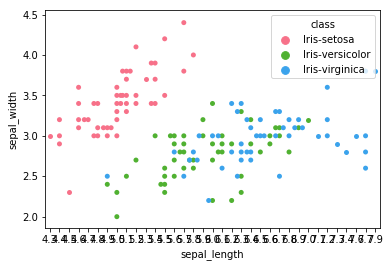

In [4]:
sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [5]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una matriz los parámetros del $\beta_1$ al $\beta_n$ para cada una de las funciones de decisión.
<span></span><br><br>
    - ***intercept_***: Nos devuelve una lista con los parámetros ***$\beta_0$*** para cada una de las funciones de decisión.
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [6]:
b0 = logreg.intercept_
b = logreg.coef_


print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1]))

print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1]))

print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1]))


Iris-setosa: Z = 0.82 + -2.50 · sepal_length + 4.01 · sepal_width

Iris-versicolor: Z = 1.23 + 0.50 · sepal_length + -1.63 · sepal_width

Iris-virginica: Z = -2.23 + 1.16 · sepal_length + -1.78 · sepal_width


<hr>


## <a name="M6">6. Visualización de los resultados</a>


* A continuación pasamos a representar en un espacio de dos dimensiones como clasificaría nuestro modelo en ese espacio 2D y como clasifica los puntos del Dataset con el que ha entrenado:


* En primer lugar vamos a definir una malla de puntos ("meshgrid") que se utilizará para pintar las regiones de cada clase. El objetivo de construir esta malla es la de predecir cada punto de la malla como si fuesen los datos de entrada de una flor con esos valores de alto y ancho.


* Para ello miramos los valores máximos y mínimos de los tamaños de la flor para acotar la región a pintar y posteriormente generamos el conjunto de puntos a predecir, llamando a la función **"predict(X)"**


In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

* Pasamos a pintar las regiones de cada clase así como los datos del dataset.


* De manera visual, podemos ver como el modelo generado es capaz de clasificar bastante bien las flores de la clase verde (Iris-Setosa), pero no es capaz de clasificar bien las flores de las clases Iris-Versicolor(color verde claro) e Iris-Virginica (color gris).

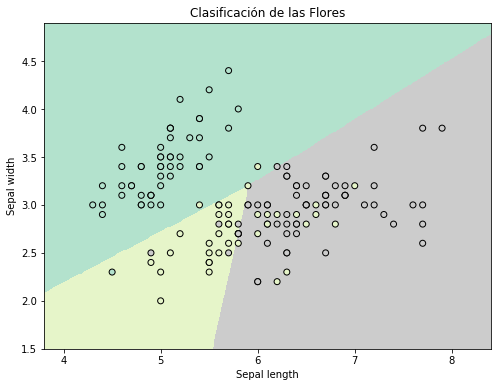

In [8]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)


# Dibujamos los puntos (flores) del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2)

plt.title('Clasificación de las Flores')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<hr>


## <a name="M7">7. Cálculo de Predicción</a>


* A continuación vamos a ver como predecir la clase de una Flor usando la librería de Scikit con el método ".predict(flor)" y como obtener esa misma predicción aplicando del modelo obtenido.


* Para ello seleccionemos una flor del Dataset, que para este ejemplo vamos a seleccionar la flor:
    - Class: Iris-Setosa
    - Sepal_lenght: 4.9
    - Sepal_With: 3.0


In [9]:
X_flor = X[1]
y_flor = y[1]

print('Flor: X={} - y={} - Clase = {}'.format(X_flor, y_flor, le.inverse_transform([y_flor])))

Flor: X=[4.9 3. ] - y=0 - Clase = ['Iris-setosa']


* A continuación vamos a ver cual es la predicción que nos devuelve Scikit-Learn.


* Vamos también cuales son los parámetros de la función de decisión y cual es el resultado de esa función de decisión para cada clase:

In [10]:
prediccion = logreg.predict([X_flor])
probabilidades = logreg.decision_function([X_flor])

print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))

Predicción -> Pertenece a la clase [0]
Predicción Etiquetada -> Pertenece a la clase ['Iris-setosa']
Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 0.62
	Iris-Versicolor: -1.24
	Iris-Virginica: -1.88


* A continuación vamos a calcular la probabilidad de esa flor para cada clase aplicando la función de decisión a una función sigmoidal:

In [11]:
# Obtenemos los parámetros
b0 = logreg.intercept_
b = logreg.coef_

# Calculamos las probabilidades
prob_setosa = 1 / (1 + math.exp(-1 * (b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1]))))
prob_versicolor = 1 / (1 + math.exp(-1 * (b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1]))))
prob_virginica = 1 / (1 + math.exp(-1 * (b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1]))))

# Imprimimos las probabilidades
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob_setosa, prob_versicolor, prob_virginica))

Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 0.65
	Iris-Versicolor: 0.22
	Iris-Virginica: 0.13


* Veamos como realizamos esos cálculos con detalle:

In [12]:
z_setosa = b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1])
z_versicolor = b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1])
z_virginica = b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1])

prob_setosa = 1 / (1 + math.exp(-1 * (z_setosa)))
prob_versicolor = 1 / (1 + math.exp(-1 * (z_versicolor)))
prob_virginica = 1 / (1 + math.exp(-1 * (z_virginica)))


# Imprimimos por pantalla la información de cada cálculo
print('\nIris-Setosa ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[0], b[0,0], X_flor[0], b[0,1], X_flor[1], z_setosa))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_setosa, 1 / (1 + math.exp(-1 * z_setosa))))


print('\nIris-Versicolor ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[1], b[1,0], X_flor[0], b[1,1], X_flor[1], z_versicolor))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_versicolor, 1 / (1 + math.exp(-1 * z_versicolor))))


print('\nIris-Virginica ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[2], b[2,0], X_flor[0], b[2,1], X_flor[0], z_virginica))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_virginica, 1 / (1 + math.exp(-1 * z_virginica))))


Iris-Setosa 
  Z =  0.82 + -2.50·4.90 + 4.01·3.00 = 0.62
  g(Z) =  1 / 1 + e^-(0.62) = 0.65

Iris-Versicolor 
  Z =  1.23 + 0.50·4.90 + -1.63·3.00 = -1.24
  g(Z) =  1 / 1 + e^-(-1.24) = 0.22

Iris-Virginica 
  Z =  -2.23 + 1.16·4.90 + -1.78·4.90 = -1.88
  g(Z) =  1 / 1 + e^-(-1.88) = 0.13


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">